In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import gc

project_dir = Path()
ts_dir = project_dir / 'csse_covid_19_data/csse_covid_19_time_series/'

confirmed_ts_fn = {f.stem.split('_')[-1] + '_' + 'confirmed': 
                   f for f in ts_dir.rglob("*.csv") if 'confirmed' in str(f)}
deaths_ts_fn = {f.stem.split('_')[-1]+ '_' + 'deaths':
                f for f in ts_dir.rglob("*.csv") if 'deaths' in str(f)}
ts_fn = {**confirmed_ts_fn, **deaths_ts_fn}

ts = {k: pd.read_csv(v) for k, v in ts_fn.items()}
rename_col_map = {'Province/State': 'Province_State',
                  'Country/Region': 'Country_Region'}
ts = {k: v.rename(mapper=rename_col_map, axis=1) for k, v in ts.items()}

def get_date_cols(df, cols_keep):
    cols = df.columns
    date_qry = cols.str.match(r'\d+/\d+/\d+')
    date_cols = cols[date_qry]
    return df[cols_keep + date_cols.tolist()]

ts = {k: get_date_cols(v, ['Country_Region', 'Province_State']) for k, v in ts.items()}

def fill_state(df):
    df['Province_State'] = df['Province_State'].fillna(df['Country_Region'])
    return df

ts = {k: fill_state(v) for k, v in ts.items()}
ts = {k: v.groupby(['Country_Region', 'Province_State']).sum() for k, v in ts.items()}

confirmed = pd.concat([v for k, v in ts.items() if 'confirmed' in k]).sort_index().T
deaths = pd.concat([v for k, v in ts.items() if 'deaths' in k]).sort_index().T
del ts
gc.collect()

0

In [2]:
confirmed.columns[(confirmed > 5000).any()].shape

(75,)

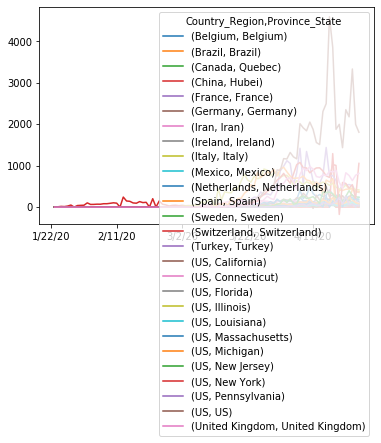

In [59]:
deaths.loc[:, deaths.columns[(deaths > 1000).any()]].diff().plot()

In [26]:
(deaths > 0).astype(np.uint8).idxmax()

Country_Region      Province_State    
Afghanistan         Afghanistan           3/22/20
Albania             Albania               3/11/20
Algeria             Algeria               3/12/20
Andorra             Andorra               3/22/20
Angola              Angola                3/29/20
                                           ...   
West Bank and Gaza  West Bank and Gaza    3/26/20
Western Sahara      Western Sahara        1/22/20
Yemen               Yemen                 1/22/20
Zambia              Zambia                 4/2/20
Zimbabwe            Zimbabwe              3/23/20
Length: 322, dtype: object

In [13]:
cty_reg_qry = [('Spain', 'Spain'), ('Italy', 'Italy')]
df_qry = deaths.loc[:, cty_reg_qry]

In [14]:
df_qry

Country_Region,Spain,Italy
Province_State,Spain,Italy
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
4/21/20,21282,24648
4/22/20,21717,25085
4/23/20,22157,25549


In [7]:
deaths.loc[('US', 'US')] > 0

1/22/20    False
1/23/20    False
1/24/20    False
1/25/20    False
1/26/20    False
           ...  
4/21/20     True
4/22/20     True
4/23/20     True
4/24/20     True
4/25/20     True
Name: (US, US), Length: 95, dtype: bool

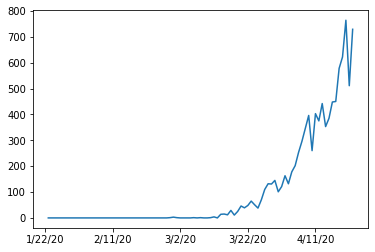

In [68]:
confirmed.loc[('Mexico', 'Mexico')].diff().plot()